In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, MinMaxScaler, RobustScaler

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/matzim95/ML-datasets/master/glass.csv')
df.head(2)

,ID,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                214 non-null    int64  
 1   refractive index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type              214 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB


In [5]:
y = df['Type']
X = df.drop(['Type'], axis=1)

In [6]:
y.value_counts()

building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: Type, dtype: int64

In [7]:
classes = y.unique()
classes

array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers', 'tableware',
       'headlamps'], dtype=object)

In [8]:
X.describe()

,ID,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### Logaritmic Regression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 10)

In [10]:
model = LogisticRegression(max_iter=10000, solver='saga')

In [12]:
parameters_to_find_from = {
    'C': np.linspace(0.1, 100, 50),
    'penalty': ['l1', 'l2']
}
gs_model = GridSearchCV(model, parameters_to_find_from)
gs_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([  0.1       ,   2.13877551,   4.17755102,   6.21632653,
         8.25510204,  10.29387755,  12.33265306,  14.37142857,
        16.41020408,  18.44897959,  20.4877551 ,  22.52653061,
        24.56530612,  26.60408163,  28.64285714,  30.68163265,
        32.72040816,  34.75918367,  36.79795918,  38.83673469,
        40.8755102 ,  42.91428571,  44.95306122,  46.99183673,
        49.03061224,  51.06938776,  53.10816327,  55.14693878,
        57.18571429,  59.2244898 ,  61.26326531,  63.30204082,
        65.34081633,  67.37959184,  69.41836735,  71.45714286,
        73.49591837,  75.53469388,  77.57346939,  79.6122449 ,
        81.65102041,  83.68979592,  85.72857143,  87.76734694,
        89.80612245,  91.84489796,  93.88367347,  95.92244898,
        97.96122449, 100.        ]),
                         'penalty': ['l1', 'l2']})

In [13]:
gs_model.best_params_

{'C': 2.138775510204082, 'penalty': 'l1'}

In [14]:
gs_model.best_score_

0.976638655462185

In [15]:
final_model = LogisticRegression(**gs_model.best_params_, max_iter=10000, solver='saga')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [16]:
print('f1_score_lr', f1_score(y_test, y_pred, average='weighted'))

f1_score_lr 1.0


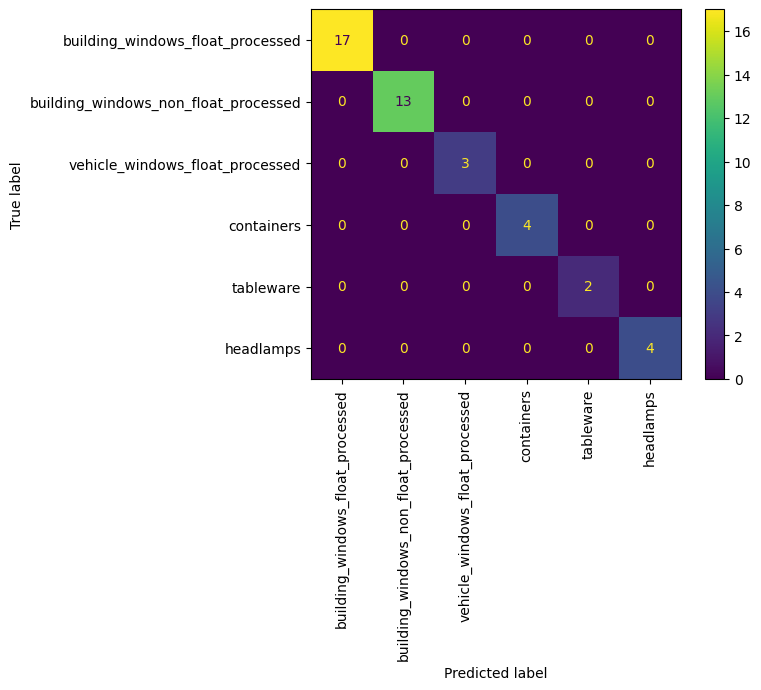

In [19]:
cm_test = confusion_matrix(y_test, y_pred)
cm_plo = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = classes)
cm_plo.plot(xticks_rotation=90)
plt.show()

### KNN Classifier and Scalers

In [189]:
#MinMax

In [190]:
scaler = MinMaxScaler()
scaler.fit(X)
df_scaled = scaler.transform(X)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 10)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_mms = knn.predict(X_test)

In [192]:
# StandardScaler

In [193]:
scaler = StandardScaler()
scaler.fit(X)
df_scaled = scaler.transform(X)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 10)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_ss = knn.predict(X_test)

In [195]:
# RobustScaler

In [196]:
scaler = RobustScaler()
scaler.fit(X)
df_scaled = scaler.transform(X)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 10)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_rs = knn.predict(X_test)

In [198]:
# No Scaler

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 10)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [200]:
print('f1_score_MinMax', f1_score(y_test, y_pred_mms, average='weighted'))
print('f1_score_StandardScaler', f1_score(y_test, y_pred_ss, average='weighted'))
print('f1_score_RobustScaler', f1_score(y_test, y_pred_rs, average='weighted'))
print('f1_score_NoScaler', f1_score(y_test, y_pred, average='weighted'))

f1_score_MinMax 0.9814814814814815
f1_score_StandardScaler 0.9814814814814815
f1_score_RobustScaler 0.9814814814814815
f1_score_NoScaler 0.9814814814814815


### NaiveBias

In [201]:
# Gaussian NaiveBias

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

In [203]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [204]:
print('f1_score_GaussianNB', f1_score(y_test, y_pred, average='weighted'))

f1_score_GaussianNB 0.7725738870183314


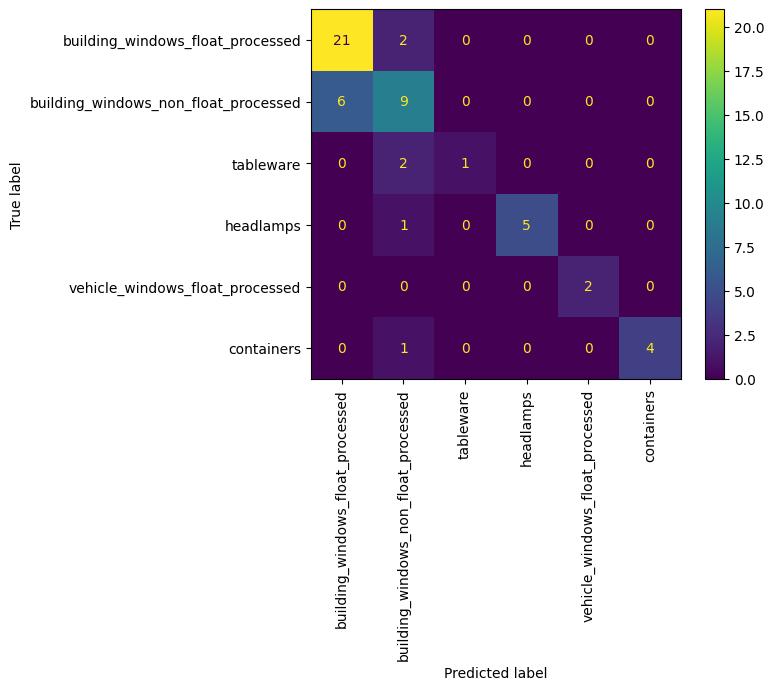

In [205]:
cm_test = confusion_matrix(y_test, y_pred)
cm_plo = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = classes)
cm_plo.plot(xticks_rotation=90)
plt.show()

In [206]:
# Multinomial NaiveBaias

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [209]:
print('f1_score_MultinomialNB', f1_score(y_test, y_pred, average='weighted'))

f1_score_MultinomialNB 0.8692741367159971


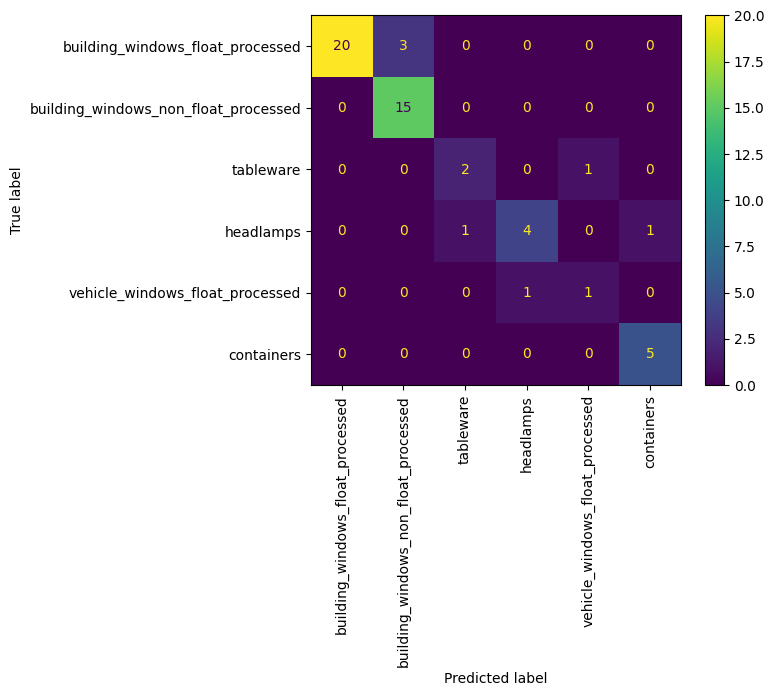

In [210]:
cm_test = confusion_matrix(y_test, y_pred)
cm_plo = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = classes)
cm_plo.plot(xticks_rotation=90)
plt.show()

### Standarization

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [212]:
model = GaussianNB()
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [213]:
print('f1_score_StandardScaler', f1_score(y_test, y_pred, average='weighted'))

f1_score_StandardScaler 0.7716450216450217


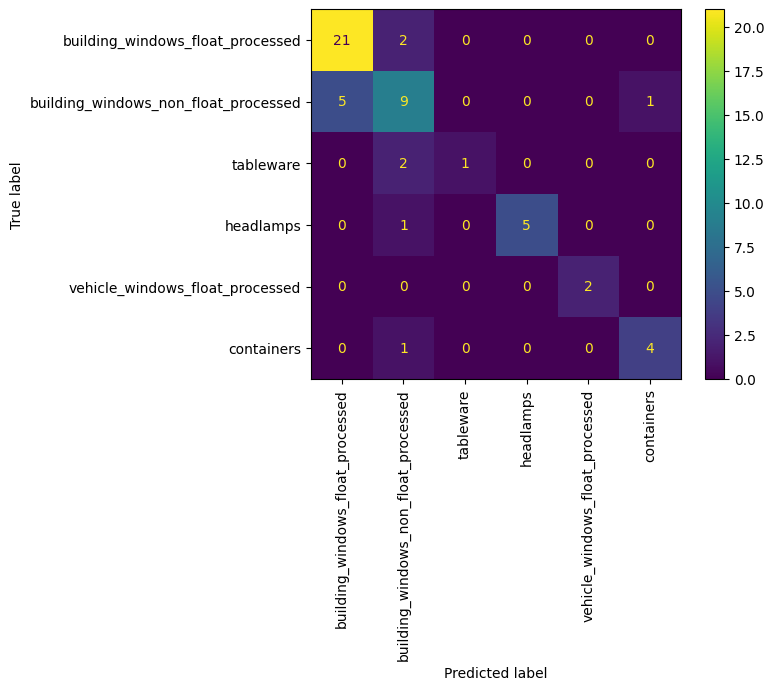

In [214]:
cm_test = confusion_matrix(y_test, y_pred)
cm_plo = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = classes)
cm_plo.plot(xticks_rotation=90)
plt.show()

### Discretization

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [216]:
model = GaussianNB()

discretizer = KBinsDiscretizer(n_bins=5, strategy='kmeans', encode='ordinal')

discretizer.fit(X_train)

X_train_discretized = discretizer.inverse_transform(discretizer.transform(X_train))
X_test_discretized = discretizer.inverse_transform(discretizer.transform(X_test))

model.fit(X_train_discretized, y_train)
y_pred = model.predict(X_test_discretized)

In [217]:
f1_score(y_test, y_pred, average='weighted')

0.7775665148214167

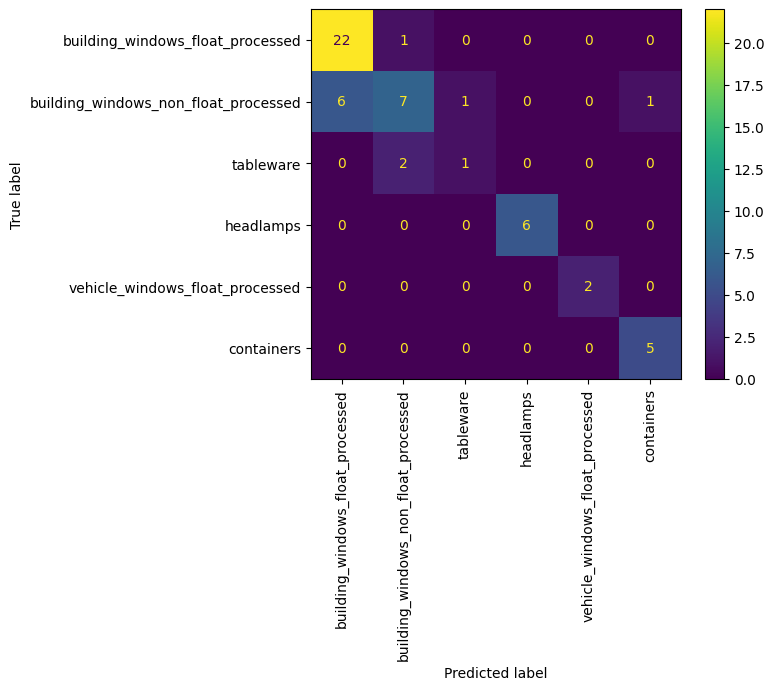

In [218]:
cm_test = confusion_matrix(y_test, y_pred)
cm_plo = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = classes)
cm_plo.plot(xticks_rotation=90)
plt.show()

In [219]:
df_results = pd.DataFrame(columns=['strategy', 'n_bins', 'f1_score'])

In [220]:
for strategy in ['uniform', 'quantile', 'kmeans']:
    for n_bins in range(2, 20):
        model = MultinomialNB() 

        discretizer = KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode='ordinal')

        discretizer.fit(X_train)

        X_train_discretized = discretizer.inverse_transform(discretizer.transform(X_train))
        X_test_discretized = discretizer.inverse_transform(discretizer.transform(X_test))

        model.fit(X_train_discretized, y_train)
        y_pred = model.predict(X_test_discretized)

        f1_ = f1_score(y_test, y_pred, average='weighted')

        df_results.loc[len(df_results)] = [strategy, n_bins, f1_]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

In [221]:
df_results.sort_values(by='f1_score', ascending=False).head(15)

,strategy,n_bins,f1_score
37,kmeans,3,0.900147
27,quantile,11,0.864333
40,kmeans,6,0.841746
28,quantile,12,0.830764
1,uniform,3,0.829652
46,kmeans,12,0.828847
22,quantile,6,0.815401
13,uniform,15,0.802651
10,uniform,12,0.802651
19,quantile,3,0.792706


### Decision Tree

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [223]:
df_results = pd.DataFrame(columns = ['deepth','f1_train', 'f1_test'])

for i in range(1,100):
    dtr = DecisionTreeClassifier(max_depth = i)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    y_pred_train = dtr.predict(X_train)
    df_results.loc[len(df_results)] = [i,f1_score(y_pred_train , y_train, average = 'weighted'),f1_score(y_test, y_pred, average='weighted')]

In [224]:
print(df_results.sort_values(by='f1_test', ascending=False).head(5))

    deepth  f1_train   f1_test
49    50.0       1.0  0.981481
74    75.0       1.0  0.981481
72    73.0       1.0  0.981481
71    72.0       1.0  0.981481
70    71.0       1.0  0.981481


In [225]:
dtr_model = DecisionTreeClassifier(max_depth = 75)
dtr_model.fit(X_train, y_train)
y_pred = dtr_model.predict(X_test)

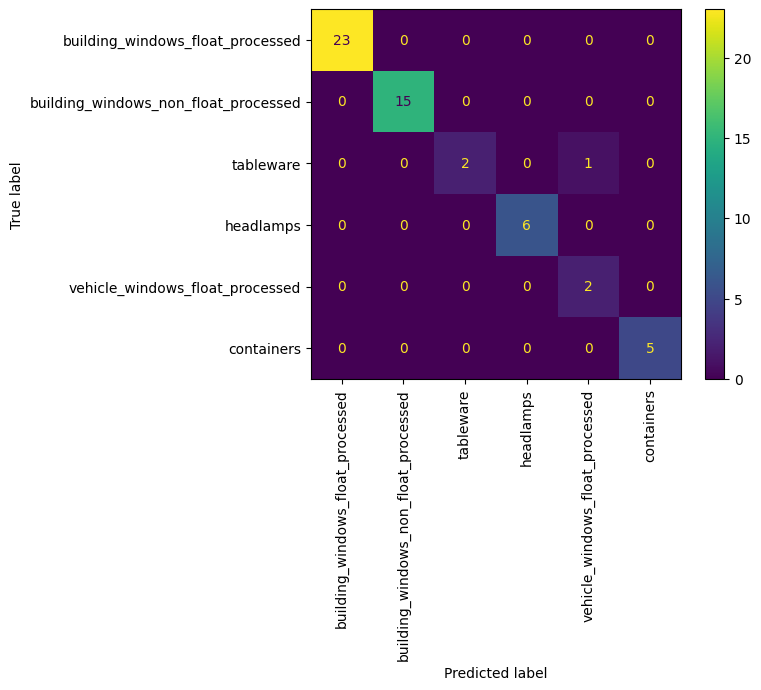

In [226]:
cm = confusion_matrix(y_test, y_pred)
cm_plo = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
cm_plo.plot(xticks_rotation=90)
plt.show()

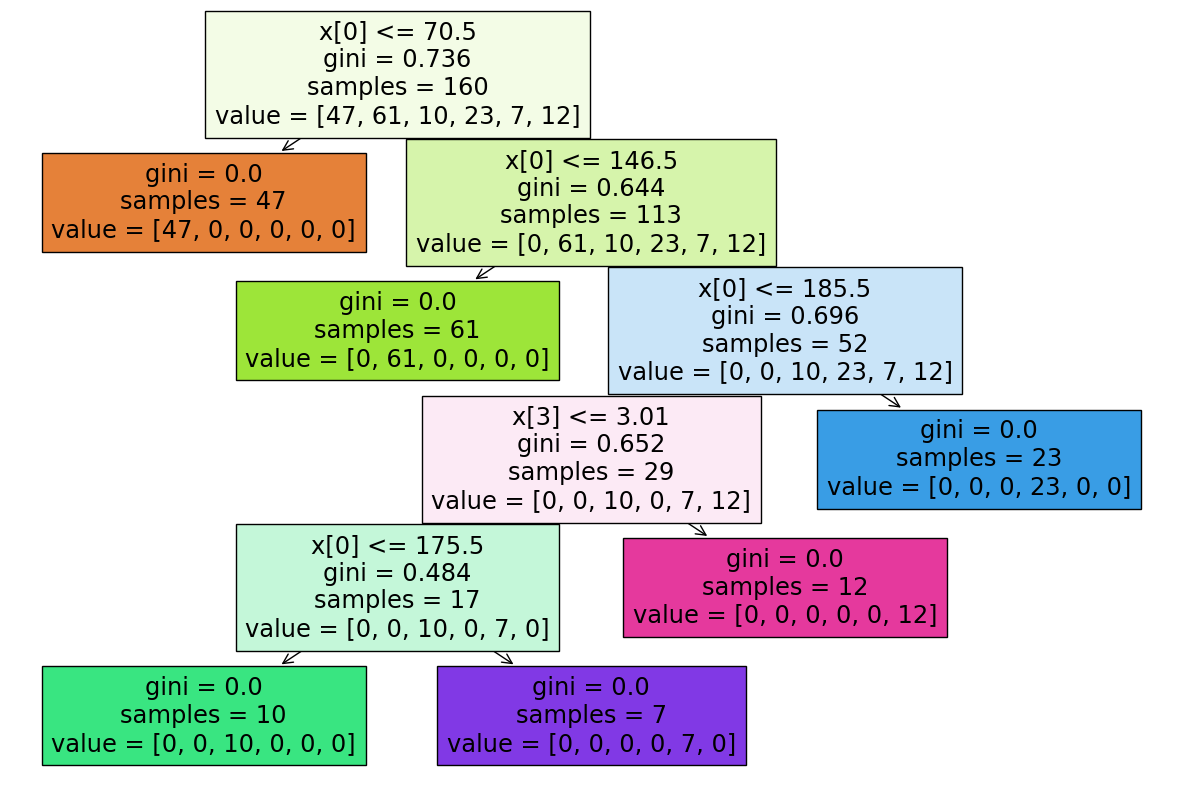

In [227]:
fig = plt.figure(figsize = (15,10))
_ = plot_tree(dtr_model, filled = True)